# JAMBOREE ADMISSION PREDICTOR

### Problem Statement
 - to understand which factors are importasnt in graduate admissions
 - how these factors are interrelated among themselves
 - prediction of one's chance of graduate admission given the rest of variables
 
### Assumption
 - The data provided is feasible to create a model and analyse the chances of admissions

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore")

# Train & Test data split
from sklearn.model_selection import train_test_split

#Feture scaling
from sklearn.preprocessing import StandardScaler

# Statsmodel linear regression
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

### Importing Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df_raw = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [4]:
df = df_raw.copy(deep=True)

### Understanding the Data

In [5]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
df.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307,105,2,2.5,4.5,8.12,1,0.67
491,492,297,99,4,3.0,3.5,7.81,0,0.54
492,493,298,101,4,2.5,4.5,7.69,1,0.53
493,494,300,95,2,3.0,1.5,8.22,1,0.62
494,495,301,99,3,2.5,2.0,8.45,1,0.68
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


The dataset provide the application level collective data which application parameters along with chance of receiving an admit from the university. The applpication parameters are:
 - GRE Score
 - TOEFL Score
 - University Ranking
 - SOP Strength
 - LOR Strength
 - CGPA
 - Research Experience

In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


 - There are in total of 500 records in the dataset with 9 columns.
 - None of the column seems to have the Null values.

In [9]:
#unique values in each column
for col in df:
    print(col,":", df[col].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


Below columns seems to be categorical in nature:
 - SOP
 - LOR
 - University Rating
 - Research

Hence, converting them into categorical values

In [10]:
#converting categorical variables into category
cat_col = ['SOP', 'LOR ', 'University Rating', 'Research']

for i in cat_col:
    df[cat_col] = df[cat_col].astype('category')

In [11]:
#checking for duplicate records
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


From the above, it can be seen there is no duplicated record.

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Serial No.,500.0,NaN,NaN,NaN,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,NaN,NaN,NaN,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,NaN,NaN,NaN,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,5.0,3.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOP,500.0,9.0,4.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOR,500.0,9.0,3.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,500.0,NaN,NaN,NaN,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,2.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,500.0,NaN,NaN,NaN,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


It can be infered from above:
 - The GRE score ranges from 290 to 340 in the records. As mean GRE score seems equivalent to median GRE score, age seems normally distributed.
 - TOEFL score ranges from 92 to 120. Similar to GRE score, mean score is equivalent to median score. Hence, it seems to be normally distributed.
 - CGPA ranges from 6.80 to 9.92. Also, the mean CGPA and median CGPA seems to be equivalent. Hence, CGPA seems to be normally distributed.
 - Change of Admit ranges from 0.34 to 0.97 in the dataset provided. Also, median chance of admit seems equivalent to mean chance of admit. Hence, chance of admit seems to be normally distributed.

### Cleaning the Data

#### 1. Checking for Null/NaN values

In [13]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

From the above, it can be seen that there are no NULL/NaN values in the dataset

#### 2. Updating the column name

In [14]:
#removing the trailing space in the column name
df.rename(columns = {'Chance of Admit ' :'Chance of Admit', 'LOR ':'LOR'}, inplace = True)

#### 3. Cleaning for Outliers

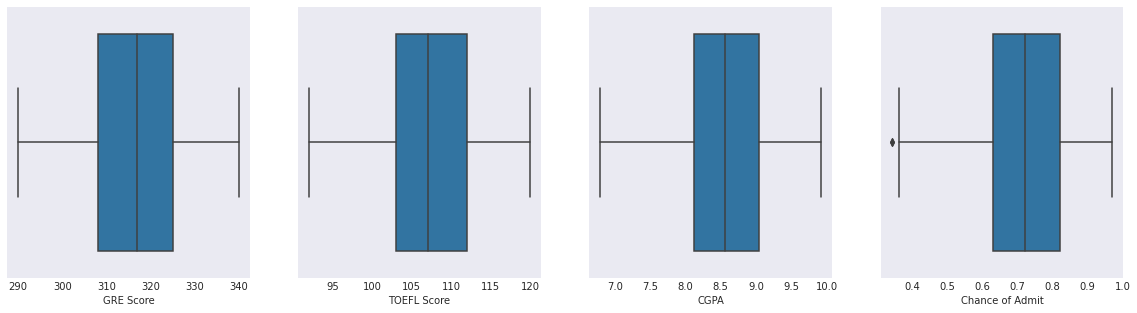

In [15]:
#outliers in 'Chance of Admit' column
col = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

plt.figure(figsize=(20,5))
for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[col[i]])
plt.show()

In [16]:
#testing for outlier data
outlier_df_overall = df.copy(deep=True)
for i in range(len(col)):
    q3 = df[col[i]].quantile(0.75)
    q1 = df[col[i]].quantile(0.25)
    iqr = q3-q1
    lower = round(q1 - 1.5*iqr,2)
    upper = round(q3 + 1.5*iqr,2)
    print(col[i])
    print('Lower bound of boxplot:', lower, '\nUpper bound of boxplot:', upper)
    outlier_df = df[(df[col[i]]>upper) | (df[col[i]]<lower)]
    outlier_df_overall = outlier_df_overall[(outlier_df_overall[col[i]]<=upper) & (outlier_df_overall[col[i]]>=lower)]
    
    outlier_data_perc = round(len(outlier_df)/len(df)*100,2)
    
    print('Total records as outliers:', len(outlier_df))
    print('Percentage of records as outliers:', outlier_data_perc, '%\n')
    print(outlier_df)
    print()

overall_outlier_df_perc = round((len(df)-len(outlier_df_overall))/len(df)*100,2)
print('Total records as outliers from all columns:', (len(df) - len(outlier_df_overall)))
print('Percentage of records as outliers:', overall_outlier_df_perc, '%')  

GRE Score
Lower bound of boxplot: 282.5 
Upper bound of boxplot: 350.5
Total records as outliers: 0
Percentage of records as outliers: 0.0 %

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

TOEFL Score
Lower bound of boxplot: 89.5 
Upper bound of boxplot: 125.5
Total records as outliers: 0
Percentage of records as outliers: 0.0 %

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

CGPA
Lower bound of boxplot: 6.76 
Upper bound of boxplot: 10.41
Total records as outliers: 0
Percentage of records as outliers: 0.0 %

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

Chance of Admit
Lower bound of boxplot: 0.35 
Upper bound of boxplot: 1.1
Total records as outliers: 2
Percentage of records as outliers: 0.4 %

     Serial No.  GRE Score  T

It can be infered from above that there are outliers present in Chance of Admit column when checked via IQR method. 
Total of 2 records, 0.4% of overall records are considered as outliers. These outliers are on the lower side of the data. Hence, removing the outliers.

In [17]:
df = outlier_df_overall.copy(deep=True)
df.reset_index(inplace=True)

#### 4. Removing Unwanted Column

In [18]:
#removing serial number column
df.drop(columns=['Serial No.', 'index'], inplace=True)

### Exploratory Data Analysis

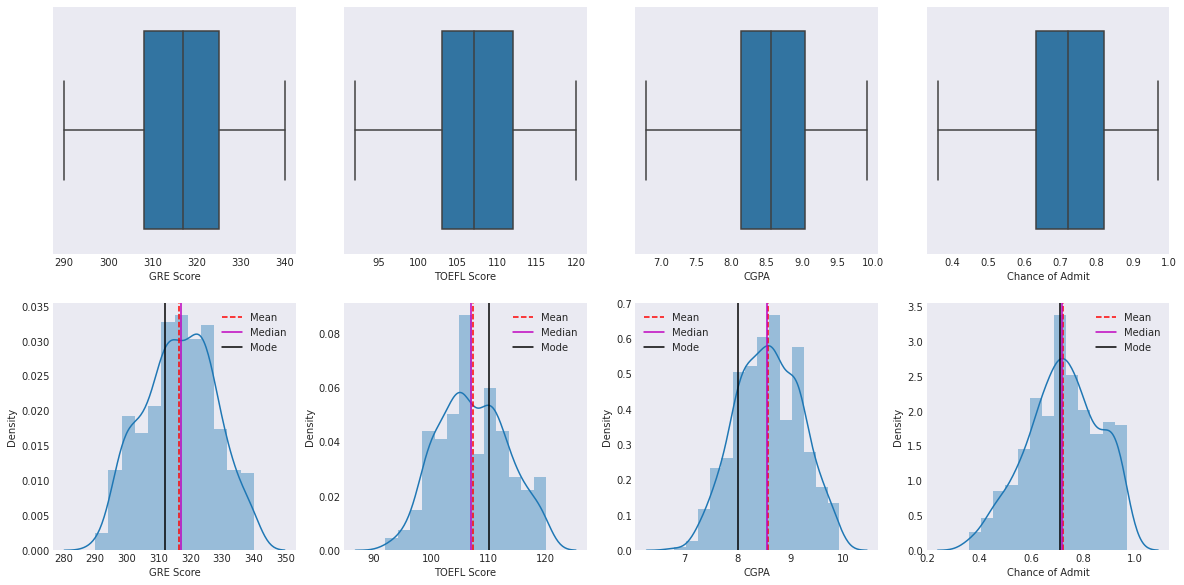

In [19]:
col = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

plt.figure(figsize=(20,10))
for i in range(len(col)):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[col[i]])

for i in range(len(col)):
    plt.subplot(2,4,i+5)
    sns.distplot(df[col[i]])
    plt.axvline(df[col[i]].mean(), color = 'r', linestyle = '--', label = 'Mean')
    plt.axvline(df[col[i]].median(), color = 'm', linestyle = '-', label = 'Median')
    plt.axvline(df[col[i]].mode()[0], color = 'black', linestyle = '-', label = 'Mode')
    plt.legend()
plt.show()

It can be infered from the above graphs, that the numerical column(features) are almost normally distributed whereas 'Chance of Admit' is slightly left skewed. 

Both mean and median co-incides for all the distribution.

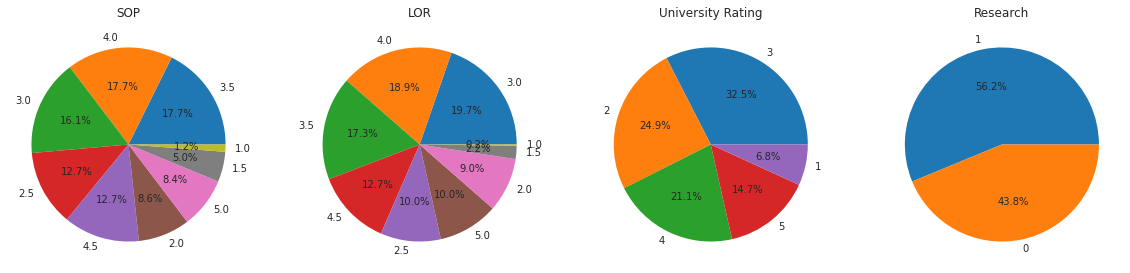

In [20]:
cat_col = ['SOP', 'LOR', 'University Rating', 'Research']

plt.figure(figsize=(20,5))

for i in range(len(cat_col)):
    plt.subplot(1,4,i+1)
    plt.pie(df[cat_col[i]].value_counts(), labels = df[cat_col[i]].value_counts().index, autopct = '%1.1f%%', textprops = {'fontsize':10})
    plt.title(cat_col[i])
plt.show()

It can be seen from above charts that, SOP and LOR rating have highest frequency between 3 to 4.5.

University rating 3 is the highest number of records available. 

Applicants with research paper are slighly higher than the non-researchers.

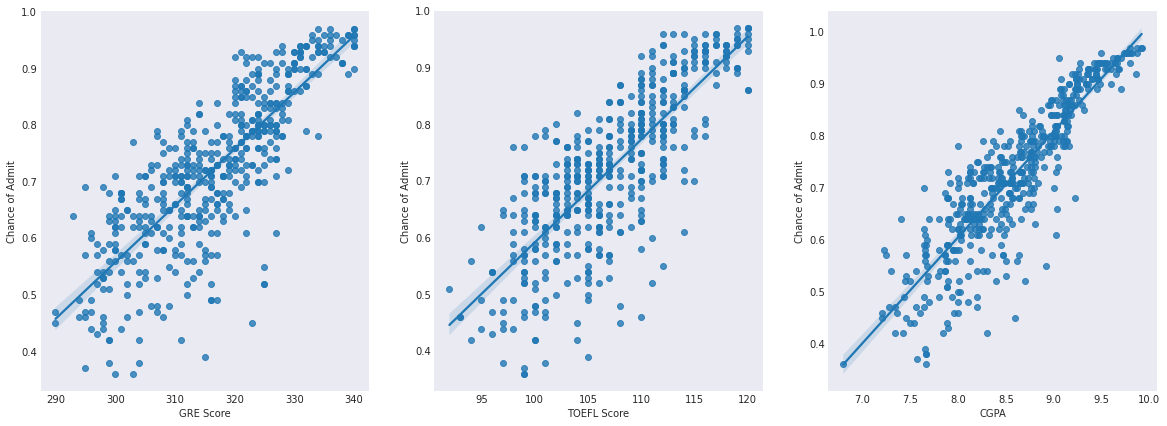

In [21]:
plt.figure(figsize=(20,7))
val_col = ['GRE Score', 'TOEFL Score', 'CGPA']

for i in range(len(val_col)):
    plt.subplot(1,3,i+1)
    sns.regplot(x=val_col[i], y='Chance of Admit', data = df)

plt.show()

It can be infered from the above graphs that there is strong positive relationship exits between Chance of Admit and numberical values - GRE Score, TOEFL score, CGPA.

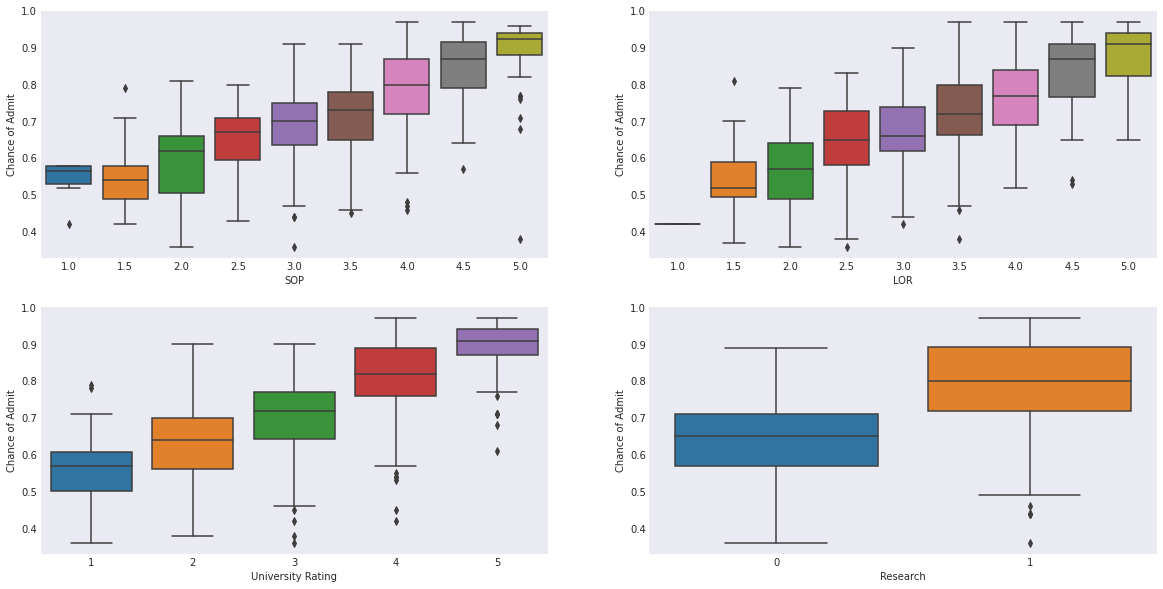

In [22]:
plt.figure(figsize=(20,10))
cat_col = ['SOP', 'LOR', 'University Rating', 'Research']

for i in range(len(cat_col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=cat_col[i], y='Chance of Admit', data = df)

plt.show()

From the above plot it can be infered that with increase in the rating or value of the categorical variable there is increase in chance of admission.

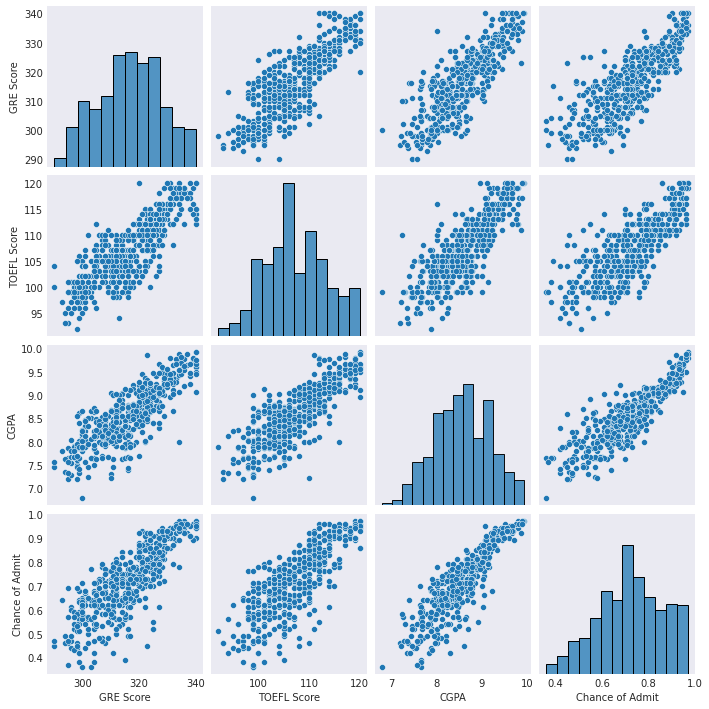

In [23]:
#checkign for correlation
sns.pairplot(df)

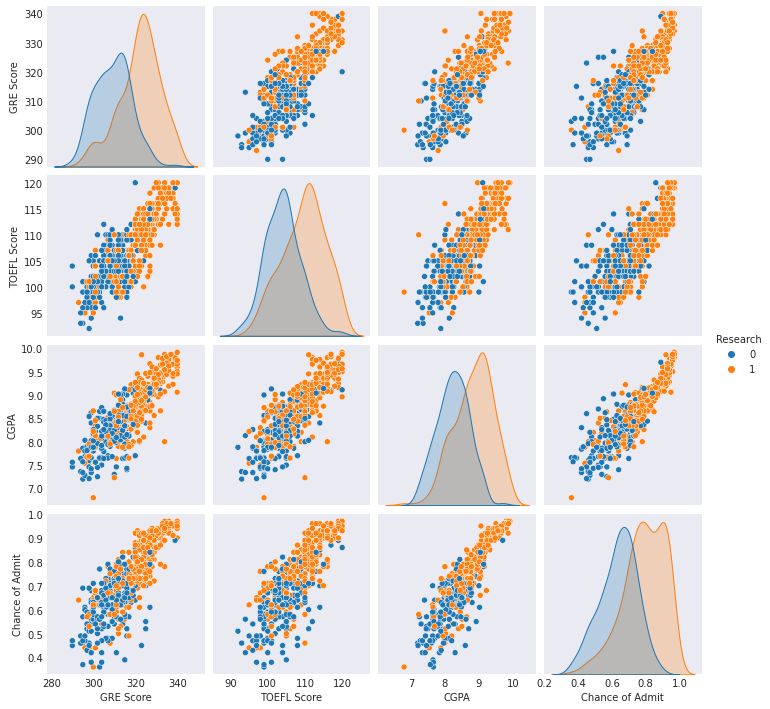

In [24]:
sns.pairplot(df, hue='Research')

It can be infered from the above graph that there is positive relationship between Chance of Admit & all numerical variables.

<AxesSubplot:>

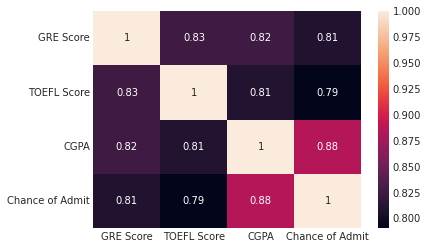

In [25]:
#check for multi colienarity
sns.heatmap(df.corr(),annot=True)

It can be seen from the above that GRE Score, TOEFL Score and CGPA are highly correlated (0.8). We should drop two of these column for modelling.

### Feature Engineering and Data Preparation for Modelling

In [26]:
sig_col = ['GRE Score', 'University Rating', 'SOP', 'LOR', 'Research', 'Chance of Admit']
sig_df = df[sig_col]
sig_df.shape

(498, 6)

In [27]:
#converting categorical column to numerical values
sig_cat_col = ['University Rating', 'SOP', 'LOR']

dummyCol = pd.get_dummies(sig_df[cat_col], drop_first=True)

In [28]:
dummyCol.head()

,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,...,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [29]:
sig_df = pd.concat([sig_df,dummyCol], axis = 1)
sig_df.drop(sig_cat_col, axis=1, inplace=True)
sig_df.shape

(498, 24)

In [30]:
#rescaling the features

scaler = StandardScaler()

num_col = ['GRE Score', 'Chance of Admit']
sig_df[num_col] = scaler.fit_transform(sig_df[num_col])
sig_df.head()

,GRE Score,Research,Chance of Admit,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,...,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
0,1.819220,1,1.413400,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0.662850,1,0.263867,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,-0.048763,1,-0.023516,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0.484947,1,0.551251,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.226666,0,-0.526436,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Splitting into test and train

In [31]:
df_train, df_test = train_test_split(sig_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(348, 24)
(150, 24)


In [32]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,348.0,-0.019623,0.989056,-2.361503,-0.760375,-0.048763,0.662850,2.086075
Chance of Admit,348.0,-0.014225,1.008494,-2.609964,-0.688089,-0.023516,0.712904,1.772629
SOP_1.5,348.0,0.043103,0.203382,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_2.0,348.0,0.080460,0.272395,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_2.5,348.0,0.143678,0.351268,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_3.0,348.0,0.166667,0.373215,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_3.5,348.0,0.183908,0.387967,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_4.0,348.0,0.155172,0.362590,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_4.5,348.0,0.129310,0.336026,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_5.0,348.0,0.086207,0.281073,0.000000,0.000000,0.000000,0.000000,1.000000


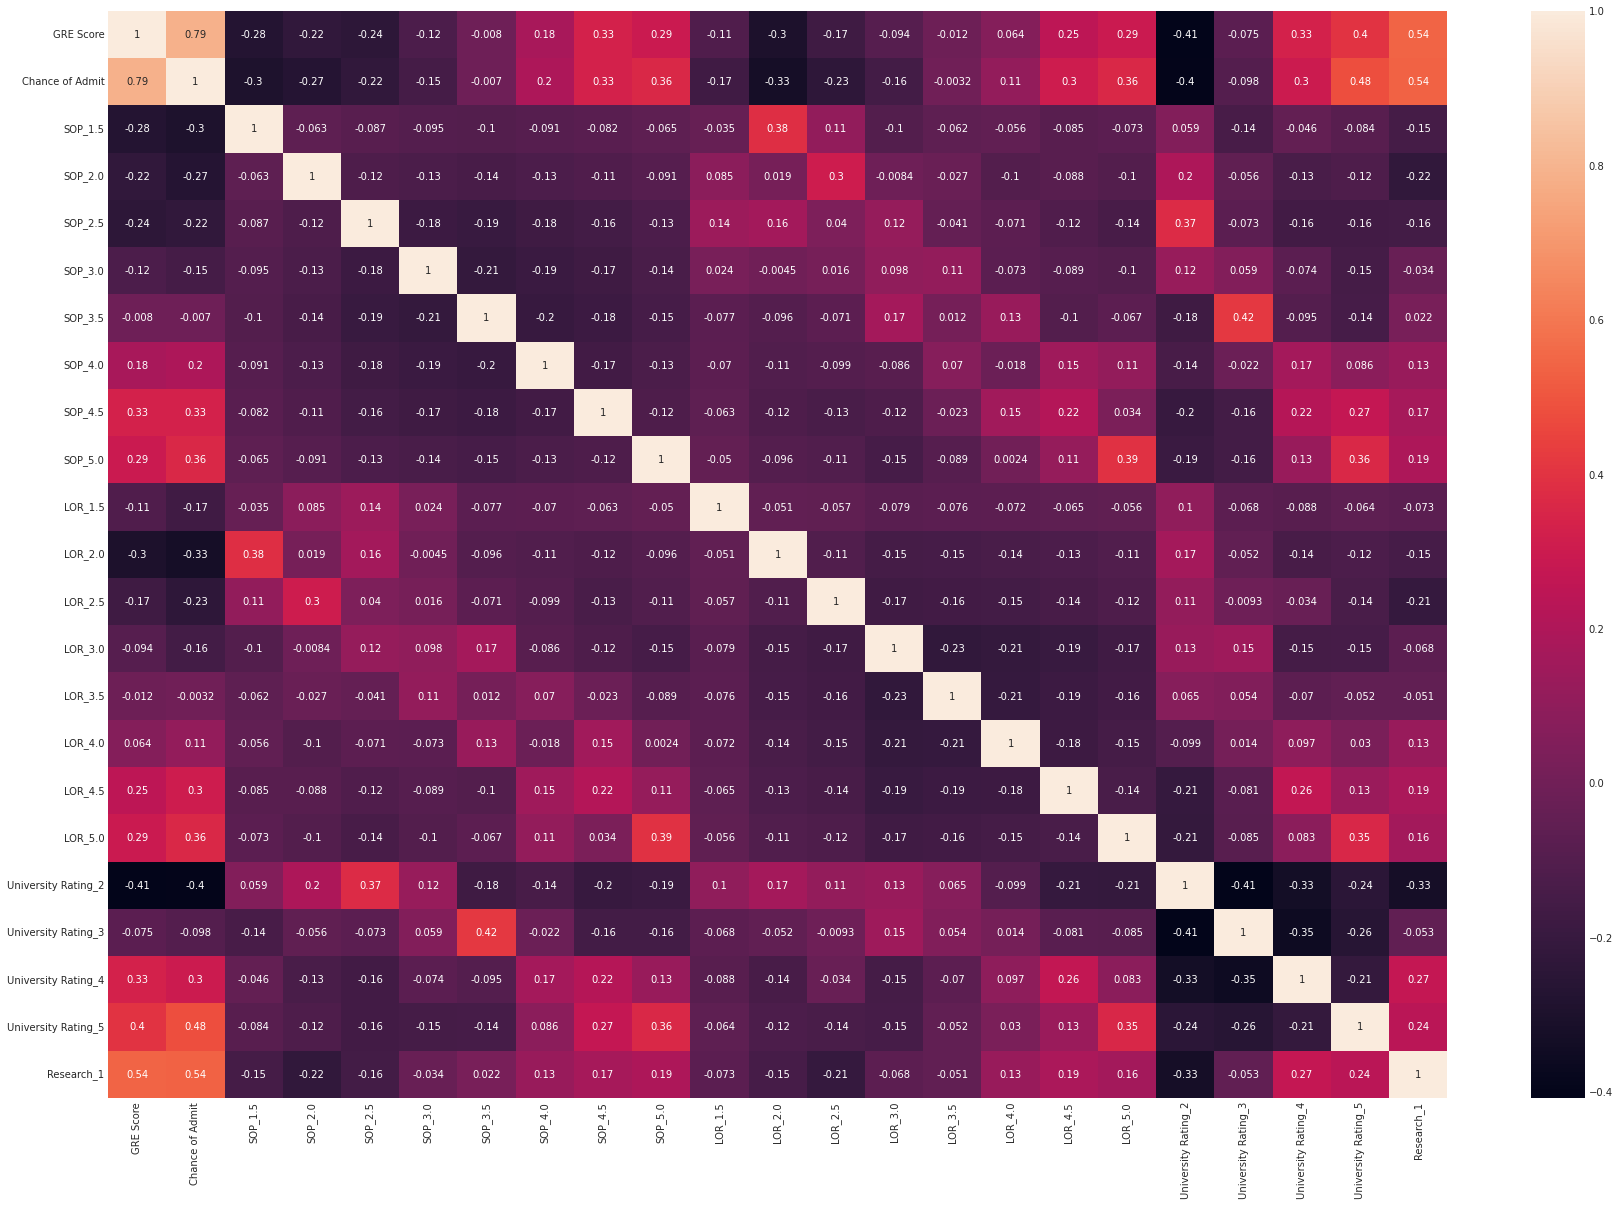

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

No features are highly correlated after creating new features using dummies.

### Training the Model

In [34]:
y_train = df_train.pop('Chance of Admit')
x_train = df_train
print(x_train.shape)
print(y_train.shape)

(348, 23)
(348,)


In [35]:
#keeping x_train for modelling
x_train_1 = x_train.copy(deep=True)

#adding constant column
x_train_1 = sm.add_constant(x_train_1)

lr_1 = sm.OLS(y_train, x_train_1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     43.05
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.71e-81
Time:                        10:38:06   Log-Likelihood:                -265.17
No. Observations:                 348   AIC:                             574.3
Df Residuals:                     326   BIC:                             659.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5287      0.250     -2.115      0.035      -1.020      -0.037
GRE Score               0.4864      0.043     11.219      0.000       0.401       0.572
Research                0.1143      0.036      3.203      0.001       0.044       0.184
SOP_1.5                -0.1083      0.311     -0.349      0.728      -0.719       0.503
SOP_2.0                 0.0579      0.299      0.194      0.847      -0.531       0.647
SOP_2.5                 0.2919      0.300      0.972      0.332      -0.299       0.883
SOP_3.0                 0.2106      0.301      0.699      0.485      -0.382       0.804
SOP_3.5                 0.3470      0.310      1.121      0.263      -0.262       0.956
SOP_4.0                 0.3732      0.314      1.190      0.235      -0.244       0.990
SOP_4.5                 0.4486      0.321      1.396      0.164      -0.184       1.081
SOP_5.0                 0.5364      0.330      1.623      0.106      -0.114       1.186
LOR_1.5                -0.4739      0.167     -2.846      0.005      -0.802      -0.146
LOR_2.0                -0.3179      0.106     -3.000      0.003      -0.526      -0.109
LOR_2.5                -0.1708      0.092     -1.847      0.066      -0.353       0.011
LOR_3.0                -0.1606      0.079     -2.032      0.043      -0.316      -0.005
LOR_3.5                 0.0249      0.079      0.315      0.753      -0.131       0.181
LOR_4.0                 0.0562      0.085      0.663      0.508      -0.111       0.223
LOR_4.5                 0.2227      0.095      2.354      0.019       0.037       0.409
LOR_5.0                 0.2906      0.109      2.667      0.008       0.076       0.505
University Rating_2     0.0378      0.143      0.264      0.792      -0.243       0.319
University Rating_3     0.0337      0.153      0.220      0.826      -0.267       0.334
University Rating_4     0.1294      0.166      0.778      0.437      -0.198       0.457
University Rating_5     0.4375      0.186      2.351      0.019       0.071       0.804
Research_1              0.1143      0.036      3.203      0.001       0.044       0.184
==============================================================================
Omnibus:                       58.488   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.297
Skew:                          -0.981   Prob(JB):                     7.45e-22
Kurtosis:                       4.692   Cond. No.                     1.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matr

It can be seen from above that:
 - R-square = 0.735
 - Based on p-value, the following features are removed
   - University Rating_3 - 0.826
   - SOP_2 - 0.847
   - LOR_3.5 - 0.753

In [36]:
x_train_2 = x_train[['GRE Score', 'Research', 'University Rating_2', 'University Rating_4', 'University Rating_5', 'SOP_1.5', 
                    'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5',
                     'LOR_3.0', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0']]

x_train_2 = sm.add_constant(x_train_2)
lr_2 = sm.OLS(y_train, x_train_2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     47.85
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.48e-82
Time:                        10:38:06   Log-Likelihood:                -265.23
No. Observations:                 348   AIC:                             570.5
Df Residuals:                     328   BIC:                             647.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4308      0.137     -3.140      0.002      -0.701      -0.161
GRE Score               0.4875      0.043     11.322      0.000       0.403       0.572
Research                0.2274      0.071      3.201      0.002       0.088       0.367
University Rating_2     0.0136      0.080      0.170      0.865      -0.144       0.171
University Rating_4     0.0999      0.094      1.061      0.289      -0.085       0.285
University Rating_5     0.4070      0.122      3.346      0.001       0.168       0.646
SOP_1.5                -0.1645      0.178     -0.925      0.356      -0.514       0.185
SOP_2.5                 0.2469      0.126      1.960      0.051      -0.001       0.495
SOP_3.0                 0.1658      0.126      1.318      0.188      -0.082       0.413
SOP_3.5                 0.3060      0.132      2.310      0.022       0.045       0.567
SOP_4.0                 0.3302      0.143      2.301      0.022       0.048       0.613
SOP_4.5                 0.4051      0.160      2.536      0.012       0.091       0.719
SOP_5.0                 0.4928      0.178      2.771      0.006       0.143       0.843
LOR_1.5                -0.5107      0.197     -2.589      0.010      -0.899      -0.123
LOR_2.0                -0.3457      0.131     -2.642      0.009      -0.603      -0.088
LOR_2.5                -0.1952      0.119     -1.636      0.103      -0.430       0.039
LOR_3.0                -0.1854      0.096     -1.925      0.055      -0.375       0.004
LOR_4.0                 0.0314      0.101      0.309      0.757      -0.168       0.231
LOR_4.5                 0.1990      0.111      1.794      0.074      -0.019       0.417
LOR_5.0                 0.2666      0.126      2.121      0.035       0.019       0.514
==============================================================================
Omnibus:                       57.706   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.660
Skew:                          -0.971   Prob(JB):                     1.69e-21
Kurtosis:                       4.682   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be infered from above:
 - R-square value doesn't change after removal of 3 variables
 - Based on p-value, the following features are removed:
   - University Rating_2 - 0.865
   - SOP_1.5 - 0.356
   - LOR_4.0 - 0.757

In [37]:
x_train_3 = x_train[['GRE Score', 'Research', 'University Rating_4', 'University Rating_5', 
                    'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5',
                     'LOR_3.0', 'LOR_4.5', 'LOR_5.0']]

x_train_3 = sm.add_constant(x_train_3)
lr_3 = sm.OLS(y_train, x_train_3).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     57.11
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           5.82e-85
Time:                        10:38:07   Log-Likelihood:                -265.76
No. Observations:                 348   AIC:                             565.5
Df Residuals:                     331   BIC:                             631.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4558      0.116     -3.945      0.000      -0.683      -0.229
GRE Score               0.4900      0.042     11.545      0.000       0.407       0.574
Research                0.2268      0.070      3.230      0.001       0.089       0.365
University Rating_4     0.0913      0.091      1.007      0.314      -0.087       0.270
University Rating_5     0.3993      0.119      3.342      0.001       0.164       0.634
SOP_2.5                 0.3001      0.113      2.660      0.008       0.078       0.522
SOP_3.0                 0.2115      0.115      1.846      0.066      -0.014       0.437
SOP_3.5                 0.3504      0.119      2.938      0.004       0.116       0.585
SOP_4.0                 0.3756      0.133      2.817      0.005       0.113       0.638
SOP_4.5                 0.4540      0.150      3.026      0.003       0.159       0.749
SOP_5.0                 0.5416      0.169      3.201      0.002       0.209       0.874
LOR_1.5                -0.5099      0.192     -2.659      0.008      -0.887      -0.133
LOR_2.0                -0.3873      0.120     -3.238      0.001      -0.623      -0.152
LOR_2.5                -0.2039      0.111     -1.835      0.067      -0.423       0.015
LOR_3.0                -0.1968      0.085     -2.316      0.021      -0.364      -0.030
LOR_4.5                 0.1835      0.097      1.898      0.059      -0.007       0.374
LOR_5.0                 0.2493      0.113      2.204      0.028       0.027       0.472
==============================================================================
Omnibus:                       55.160   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.356
Skew:                          -0.938   Prob(JB):                     2.40e-20
Kurtosis:                       4.648   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I can be infered that:
 - There is no significant change in R-square value (just lower by 0.001)
 - Based on the p-value, the following features are removed
   - University Rating_4
   - SOP_3.0
   - LOR_2.5

In [38]:
x_train_4 = x_train[['GRE Score', 'Research', 'University Rating_5', 'SOP_2.5', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5',
                     'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_3.0', 'LOR_4.5', 'LOR_5.0']]

x_train_4 = sm.add_constant(x_train_4)
lr_4 = sm.OLS(y_train,x_train_4).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     68.03
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.56e-85
Time:                        10:38:07   Log-Likelihood:                -271.06
No. Observations:                 348   AIC:                             570.1
Df Residuals:                     334   BIC:                             624.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4037      0.074     -5.487      0.000      -0.548      -0.259
GRE Score               0.5073      0.042     12.153      0.000       0.425       0.589
Research                0.2670      0.070      3.836      0.000       0.130       0.404
University Rating_5     0.3336      0.102      3.277      0.001       0.133       0.534
SOP_2.5                 0.1913      0.093      2.052      0.041       0.008       0.375
SOP_3.5                 0.2519      0.089      2.821      0.005       0.076       0.428
SOP_4.0                 0.3027      0.102      2.975      0.003       0.103       0.503
SOP_4.5                 0.3984      0.116      3.433      0.001       0.170       0.627
SOP_5.0                 0.4771      0.141      3.392      0.001       0.200       0.754
LOR_1.5                -0.4680      0.189     -2.481      0.014      -0.839      -0.097
LOR_2.0                -0.3548      0.112     -3.174      0.002      -0.575      -0.135
LOR_3.0                -0.1380      0.081     -1.711      0.088      -0.297       0.021
LOR_4.5                 0.2311      0.095      2.423      0.016       0.043       0.419
LOR_5.0                 0.2901      0.113      2.563      0.011       0.067       0.513
==============================================================================
Omnibus:                       57.354   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.321
Skew:                          -0.964   Prob(JB):                     2.00e-21
Kurtosis:                       4.691   Cond. No.                         8.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value, we can remove the following features, as there is no very significant change in R-square value:
 - SOP_2.5
 - LOR_3.0
 - LOR_1.5

In [39]:
x_train_5 = x_train[['GRE Score', 'Research', 'University Rating_5', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5',
                     'SOP_5.0', 'LOR_2.0', 'LOR_4.5', 'LOR_5.0']]

x_train_5 = sm.add_constant(x_train_5)
lr_5 = sm.OLS(y_train,x_train_5).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     85.29
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.57e-86
Time:                        10:38:07   Log-Likelihood:                -276.73
No. Observations:                 348   AIC:                             575.5
Df Residuals:                     337   BIC:                             617.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4150      0.063     -6.584      0.000      -0.539      -0.291
GRE Score               0.5105      0.042     12.095      0.000       0.427       0.593
Research                0.2651      0.070      3.765      0.000       0.127       0.404
University Rating_5     0.3343      0.103      3.245      0.001       0.132       0.537
SOP_3.5                 0.2128      0.085      2.516      0.012       0.046       0.379
SOP_4.0                 0.2832      0.098      2.885      0.004       0.090       0.476
SOP_4.5                 0.3840      0.113      3.398      0.001       0.162       0.606
SOP_5.0                 0.4641      0.139      3.341      0.001       0.191       0.737
LOR_2.0                -0.2749      0.109     -2.518      0.012      -0.490      -0.060
LOR_4.5                 0.2653      0.095      2.799      0.005       0.079       0.452
LOR_5.0                 0.3170      0.113      2.799      0.005       0.094       0.540
==============================================================================
Omnibus:                       54.440   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.961
Skew:                          -0.961   Prob(JB):                     5.86e-19
Kurtosis:                       4.449   Cond. No.                         7.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value, we can remove the following features, as there is no very significant change in R-square value:
 - SOP_3.5
 - SOP_4.0
 - LOR_2.0

In [40]:
x_train_6 = x_train[['GRE Score', 'Research', 'University Rating_5', 'SOP_4.5',
                     'SOP_5.0', 'LOR_4.5', 'LOR_5.0']]

x_train_6 = sm.add_constant(x_train_6)
lr_6 = sm.OLS(y_train,x_train_6).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           7.22e-85
Time:                        10:38:07   Log-Likelihood:                -286.90
No. Observations:                 348   AIC:                             589.8
Df Residuals:                     340   BIC:                             620.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3403      0.055     -6.212      0.000      -0.448      -0.233
GRE Score               0.5714      0.041     13.956      0.000       0.491       0.652
Research                0.2765      0.072      3.842      0.000       0.135       0.418
University Rating_5     0.3554      0.105      3.394      0.001       0.149       0.561
SOP_4.5                 0.2120      0.102      2.080      0.038       0.012       0.412
SOP_5.0                 0.2625      0.127      2.059      0.040       0.012       0.513
LOR_4.5                 0.3277      0.095      3.466      0.001       0.142       0.514
LOR_5.0                 0.3824      0.114      3.350      0.001       0.158       0.607
==============================================================================
Omnibus:                       48.569   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.338
Skew:                          -0.903   Prob(JB):                     5.32e-16
Kurtosis:                       4.260   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value, we can remove the following features, as there is no very significant change in R-square value:
 - SOP_4.5
 - SOP_5.0

In [41]:
x_train_7 = x_train[['GRE Score', 'Research', 'University Rating_5', 'LOR_4.5', 'LOR_5.0']]

x_train_7 = sm.add_constant(x_train_7)
lr_7 = sm.OLS(y_train,x_train_7).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.20e-85
Time:                        10:38:07   Log-Likelihood:                -290.25
No. Observations:                 348   AIC:                             592.5
Df Residuals:                     342   BIC:                             615.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3133      0.054     -5.821      0.000      -0.419      -0.207
GRE Score               0.5970      0.040     14.999      0.000       0.519       0.675
Research                0.2777      0.072      3.836      0.000       0.135       0.420
University Rating_5     0.4363      0.101      4.340      0.000       0.239       0.634
LOR_4.5                 0.3743      0.093      4.007      0.000       0.191       0.558
LOR_5.0                 0.4350      0.110      3.968      0.000       0.219       0.651
==============================================================================
Omnibus:                       47.620   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.401
Skew:                          -0.893   Prob(JB):                     1.40e-15
Kurtosis:                       4.237   Cond. No.                         5.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be seen from above:
 - R-square value is 0.694 (almost 0.7)
 - Now that all p-values are 0, we can consider this as best fit model.

### Validate the Assumption for Linear Regression

#### 1. Multicollinearity Check - VIF Score

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_7.values, i) for i in range(x_train_7.shape[1])]
vif["features"] = x_train_7.columns
vif

,VIF Factor,features
0,3.192483,const
1,1.702381,GRE Score
2,1.426649,Research
3,1.300569,University Rating_5
4,1.143123,LOR_4.5
5,1.257986,LOR_5.0


All VIF scores are below 5, indicating no multicollinearity.

In [43]:
df_pred = df_test.copy(deep=True)
df_test.shape

(150, 24)

In [44]:
y_test = df_test.pop('Chance of Admit')
x_test = df_test
x_test = sm.add_constant(x_test)

In [45]:
x_test_new = x_test[x_train_7.columns]

y_pred = lr_7.predict(x_test_new)

#### 2. Mean of Residuals

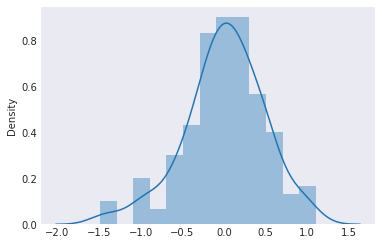

In [46]:
residual = y_test - y_pred
sns.distplot(residual)
plt.show()

In [47]:
abs(residual.mean())

0.00732700431340748

It can be infered from the model's mean residual is 0.0073, which indicates it is a good estimator.

#### 3. Linearity of Variables

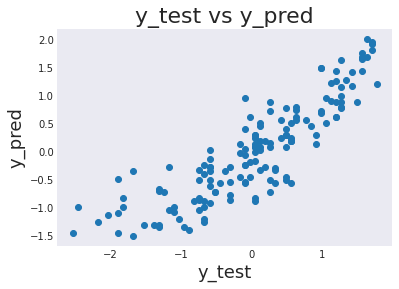

In [48]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize=22)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

#### 4. Test for Homoscedasticity

eval_env: 1


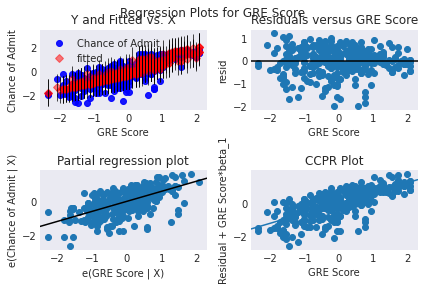

In [49]:

sm.graphics.plot_regress_exog(lr_7, 'GRE Score')
plt.show()

It can be infered that
 - points are spread randomly
 - points of residual are scattered around 0
 
Hence, there is no heteroscedasticity.

#### 5. Normality of Residuals

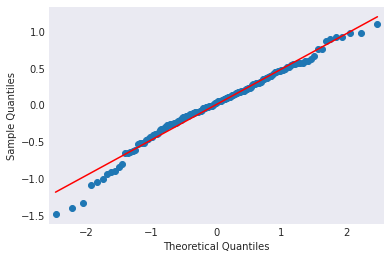

In [50]:
sm.qqplot(residual, line = 's')
plt.show()

It can be inferred from the above, that the data is aligned closely to the dotted line. Hence, residual are normally distributed.

### Model Performance Evaluation

In [51]:
r2 = r2_score(y_test,y_pred)
adj_r2 = lr_7.rsquared_adj
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error( y_test, y_pred )
rmse = np.sqrt( mean_squared_error( y_test, y_pred ))
mape = mean_absolute_percentage_error(y_test,y_pred)

print('R-Square value:', round(r2,2))
print('Adjusted R-Square Value:', round(adj_r2,2))
print('Mean Absolute Error:', round(mae,2))
print('Mean Square Error:', round(mse,2))
print('Root Mean Square Error:', round(rmse,2))
print('Mean Absolute Percentage Error:', round(mape,2))

R-Square value: 0.76
Adjusted R-Square Value: 0.69
Mean Absolute Error: 0.37
Mean Square Error: 0.23
Root Mean Square Error: 0.48
Mean Absolute Percentage Error: 1.51


 - R-Square - 0.76
   - As R2 value is not too low or too high, this means that our model is a good model and donot have ny bias.
 - Mean Absolute Error - 0.37
   - As MAE value is slightly on the lower side, this mean our model is good but not the perfect model. There is further chance of improvement.
 - Root Mean Square Error - 0.48
   - As difference between MAE and RSME is on the lower side, this indicates less outliers.

### Test & Train Performance

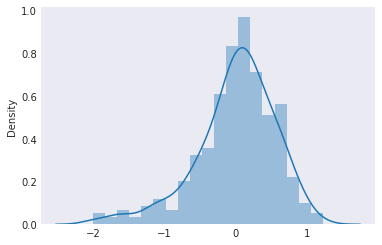

In [52]:
#train performance
y_train_pred = lr_7.predict(x_train_7)
res = y_train - y_train_pred

sns.distplot(res)
plt.show()

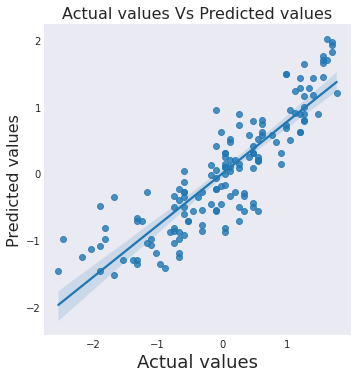

In [53]:
#test performance
df_pred['preds'] = y_pred

sns.lmplot(x='Chance of Admit', y="preds", data=df_pred)
plt.xlabel('Actual values', fontsize=18)                        
plt.ylabel('Predicted values', fontsize=16)  
plt.title('Actual values Vs Predicted values', fontsize=16)
plt.show()

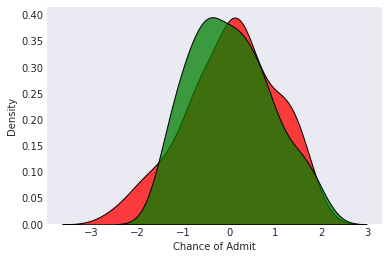

In [54]:
sns.kdeplot(data=df_pred, x='Chance of Admit', color='r', multiple="stack")
sns.kdeplot(data=df_pred, x='preds', color='g', multiple="stack")
plt.show()

It can be infered from the above plots that the model is a good estimator.

### Insights
 - About 56% of aplicants who have done research while ~44% of the applicants said no to research.
 - GRE Score, TOEFL Score and CGPA are highly correlated, any application who have high score in one, most likely to have higher score in other two as well.
 - Chance of Admit increases with higher scores and LOR, SOP ratings.
 - Most of the applicants have SOP and LOR rating between 3 to 4.5
 - The below variables describes the chances of admit to a good extent having lower p-value and low VIF:
   - GRE Score: Coef- 0.5970
   - Research: Coef- 0.2777
   - LOR_4.5: Coef- 0.3743
   - LOR_5.0: Coef- 0.4350
   - University Rating_5: Coef- 0.4363
 - Constant value is -0.1333
 
#### Possible Model Improvement Areas
 - Build a non-linear model
 - Including new featurea like GRE, TOEFL and CGPA ratios
 
### Recommendations
 - Graduation Admission - Can use the above model to create new feature where students/learners can come to their website and check their probability of getting into the IVY league college.
 - Key features which influence the chance of Admit are:
   - GRE Score
   - Research
   - TOEFL Score
   - CGPA
   - LOR greater or equal to than 4.5
 - A higher University rating will increases the chance of admission
 - A higher value of LOR and SOP will also increases the chance of admission for the student.

#### Please upvote if you find the notebook helpful. 

#### Also, please provide feedback to improve further. 